In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import umap

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

### Carregar features e classes

In [2]:
with open('../numpy_arrays/pooler_features_test_videos.npy', 'rb') as f:
    classifier_pooler_features = np.load(f)
    
print(classifier_pooler_features.shape)

(550, 1024)


In [3]:
with open('../numpy_arrays/labels_array.npy', 'rb') as f:
    labels = np.load(f)
    
print(labels.shape)

(550,)


In [4]:
class_map = {
    '0': 'kick-off',
    '1': 'ball_out_of_play',
    '2': 'throw-in',
    '3': 'corner',
    '4': 'shots_on_target',
    '5': 'offside',
    '6': 'shots_off_target',
    '7': 'clearance',
    '8': 'goal',
    '9': 'foul',
    '10': 'yellow_card',
    '11': 'indirect_free-kick',
    '12': 'direct_free-kick',
    '13': 'substitution',
}

In [5]:
labels_mapped = [class_map[i] for i in labels]
print(np.unique(labels_mapped))

['ball_out_of_play' 'clearance' 'corner' 'direct_free-kick' 'foul' 'goal'
 'indirect_free-kick' 'kick-off' 'offside' 'shots_off_target'
 'shots_on_target' 'substitution' 'throw-in' 'yellow_card']


In [6]:
labels

array(['0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

### Aplicar UMAP

In [7]:
features_transformed = umap.UMAP(n_neighbors=5).fit_transform(classifier_pooler_features)
print(features_transformed.shape)

(550, 2)


In [8]:
df = pd.DataFrame(features_transformed, columns=['x', 'y'])
df['label'] = labels_mapped
df.head()

,x,y,label
0,6.894274,9.390460,kick-off
1,16.697041,10.025148,kick-off
2,12.858630,11.011213,kick-off
3,12.296213,10.968472,kick-off
4,8.559197,3.250069,ball_out_of_play


### Plotar resultados

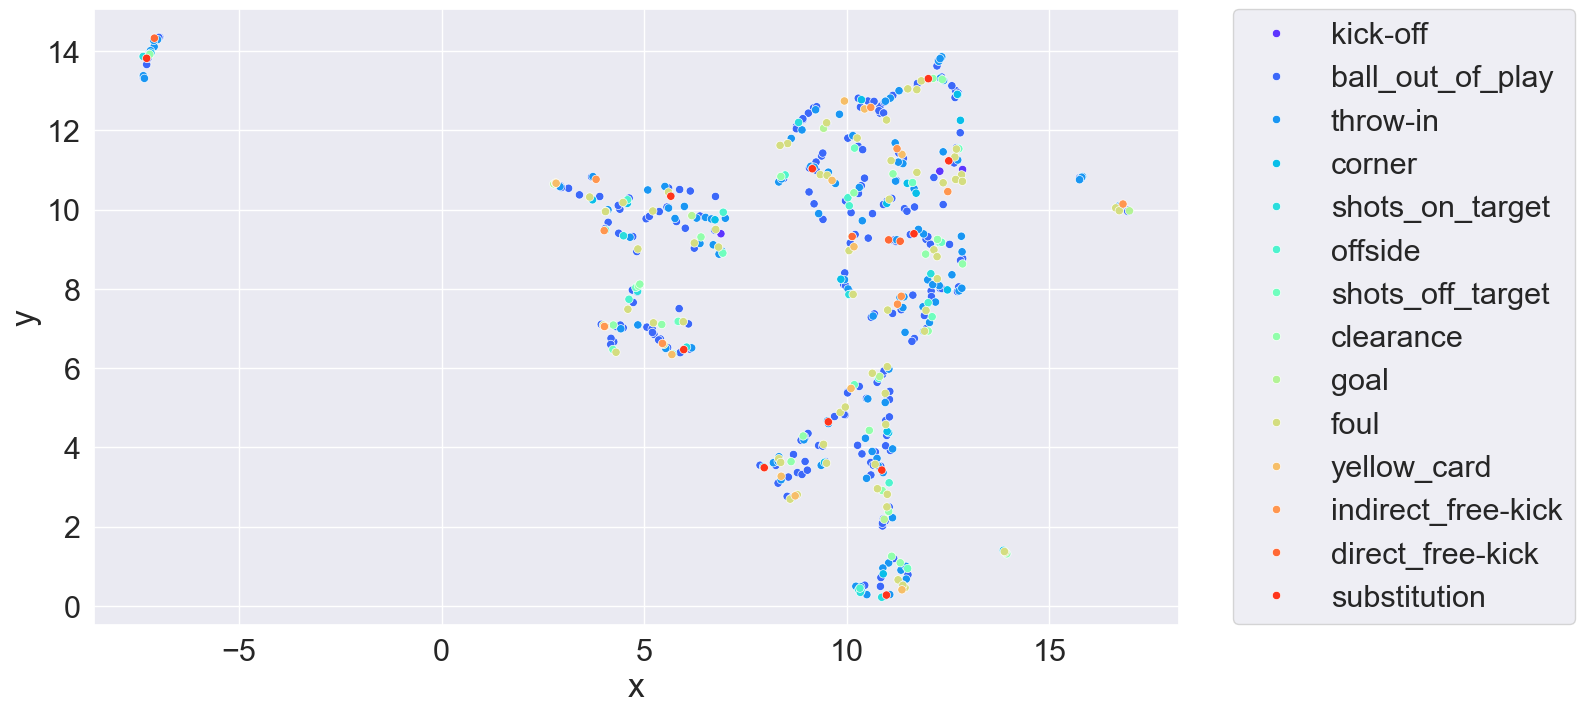

In [9]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Testando hiperparâmetros

Variando n_neighbors

In [10]:
def run_umap_and_plot(n_neighbors, features, labels_mapped, min_dist=0.1):
    features_transformed = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist).fit_transform(features)
    
    df = pd.DataFrame(features_transformed, columns=['x', 'y'])
    df['label'] = labels_mapped
    
    _ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend='full')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

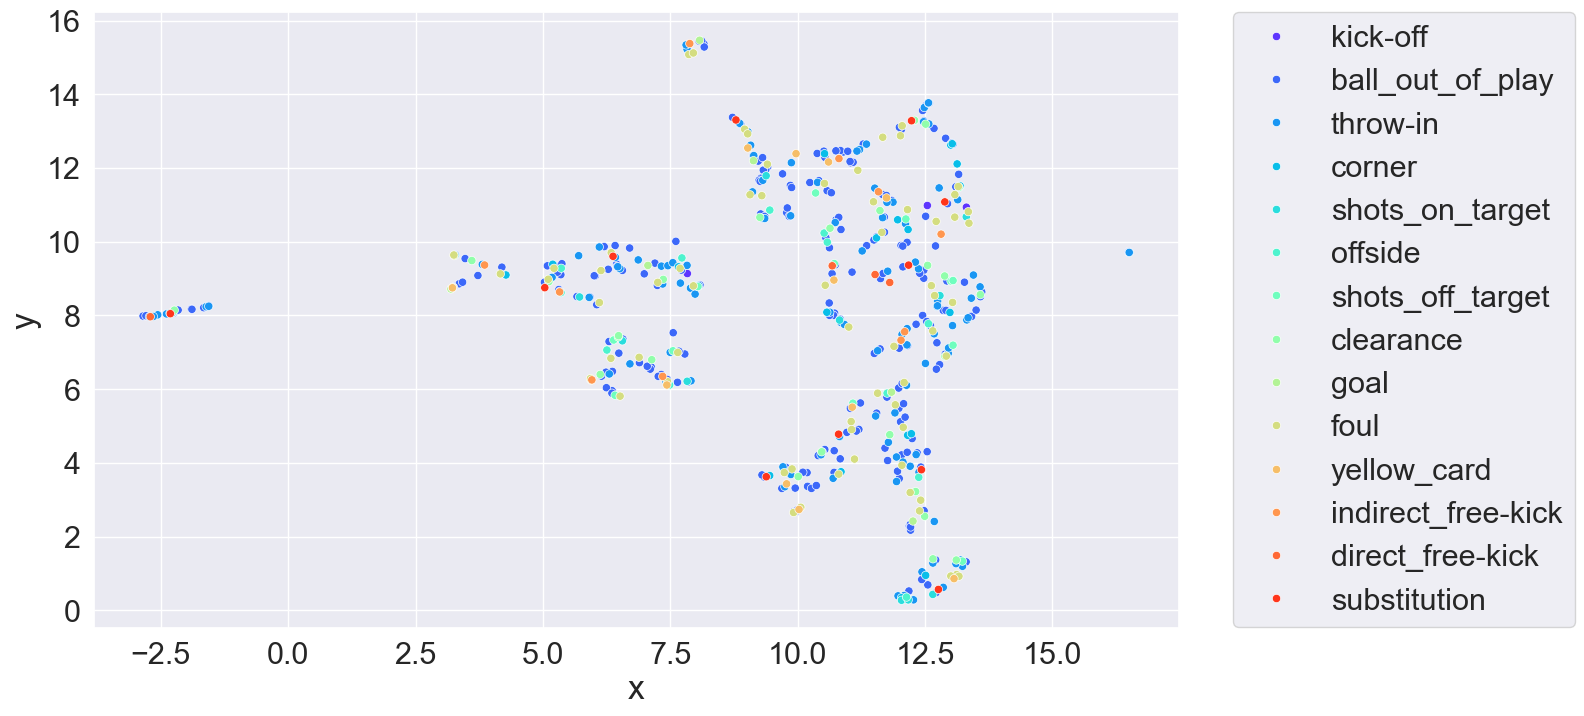

In [11]:
run_umap_and_plot(5, classifier_pooler_features, labels_mapped)

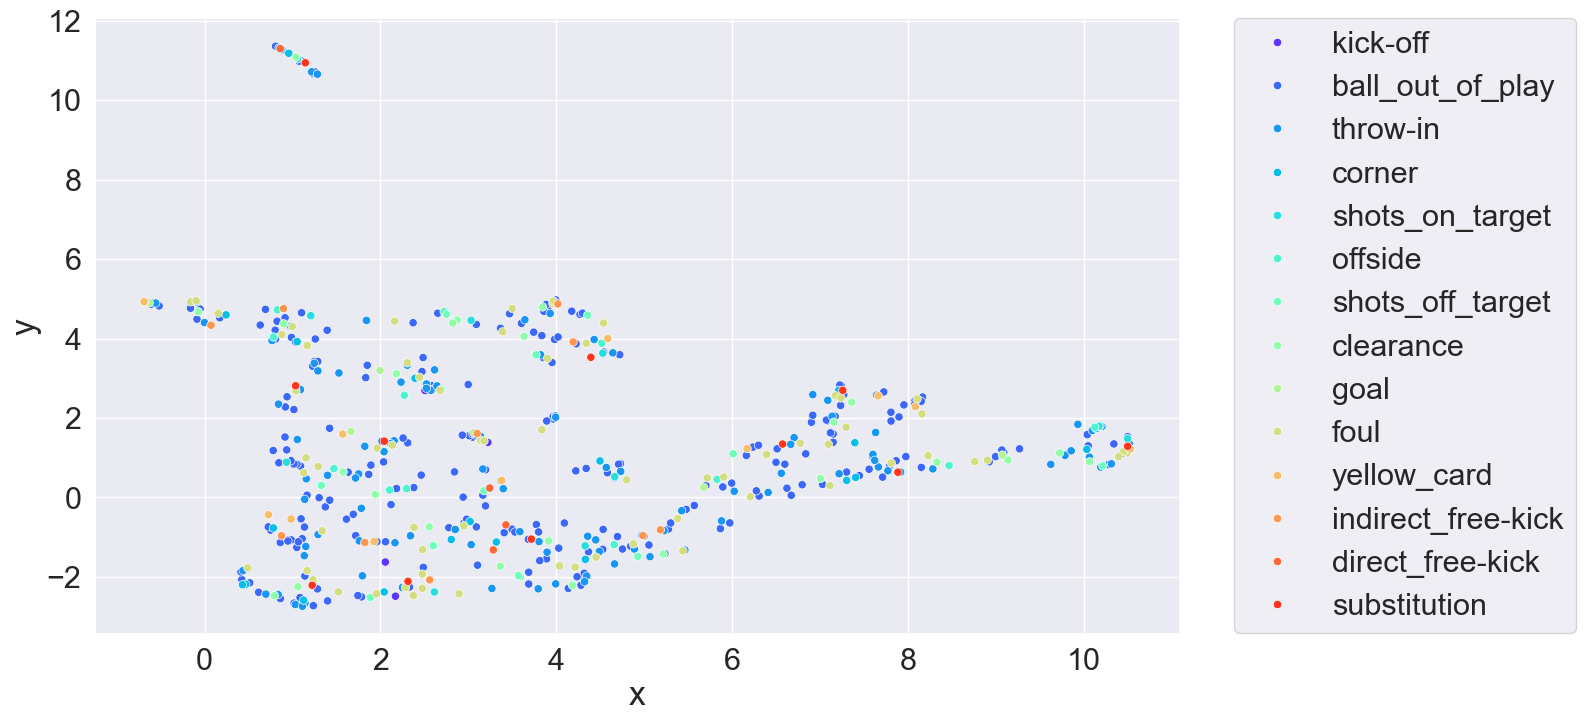

In [12]:
run_umap_and_plot(10, classifier_pooler_features, labels_mapped)

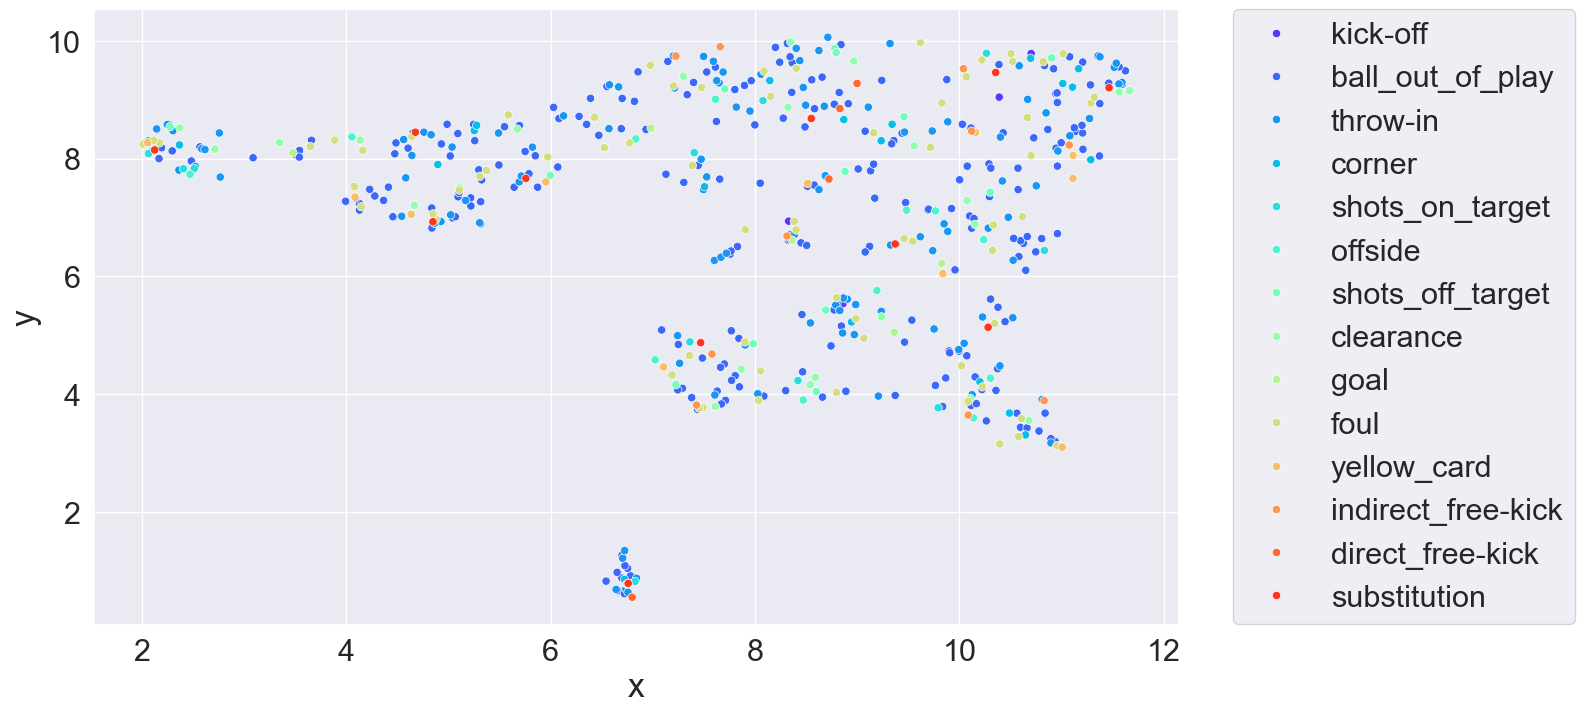

In [13]:
run_umap_and_plot(20, classifier_pooler_features, labels_mapped)

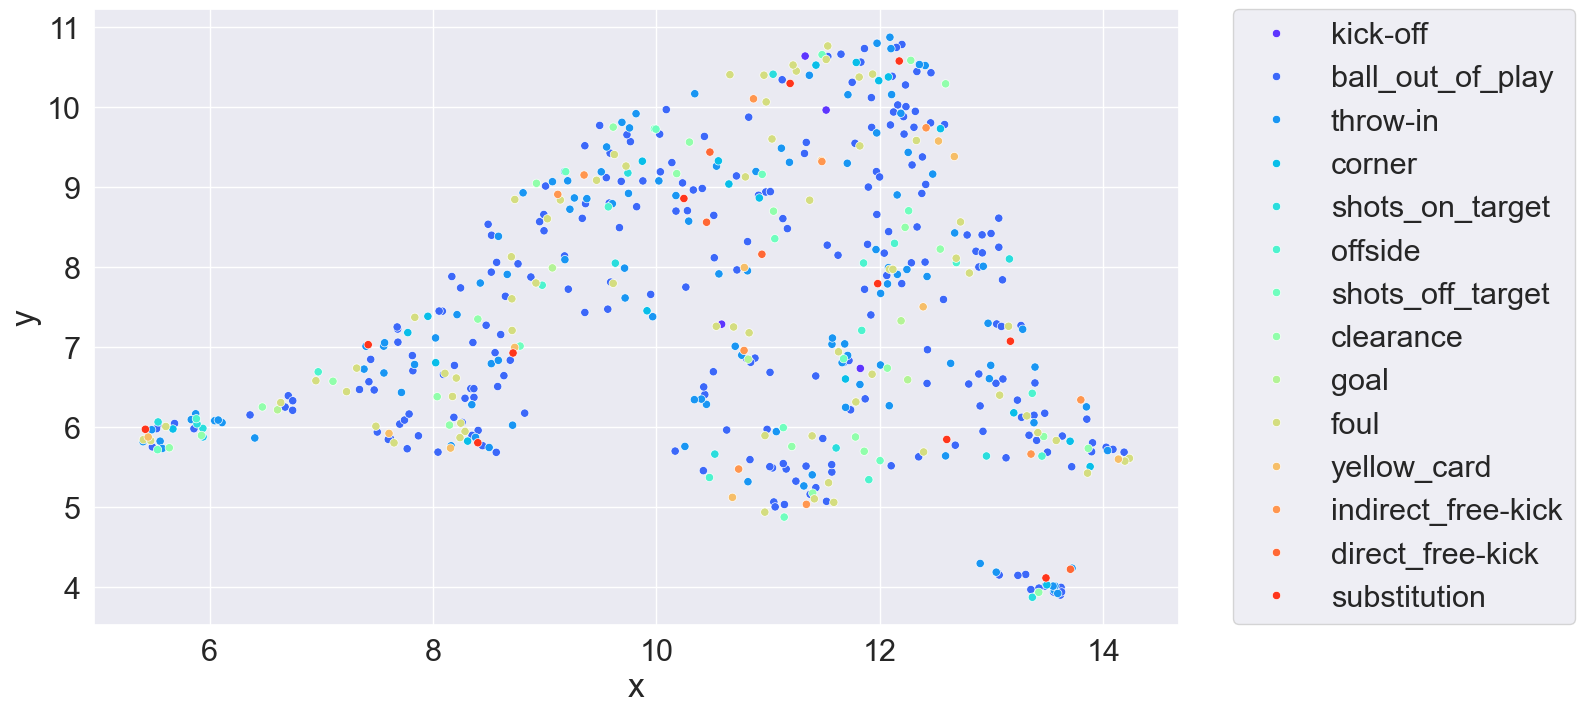

In [14]:
run_umap_and_plot(50, classifier_pooler_features, labels_mapped)

Variando o min_dist

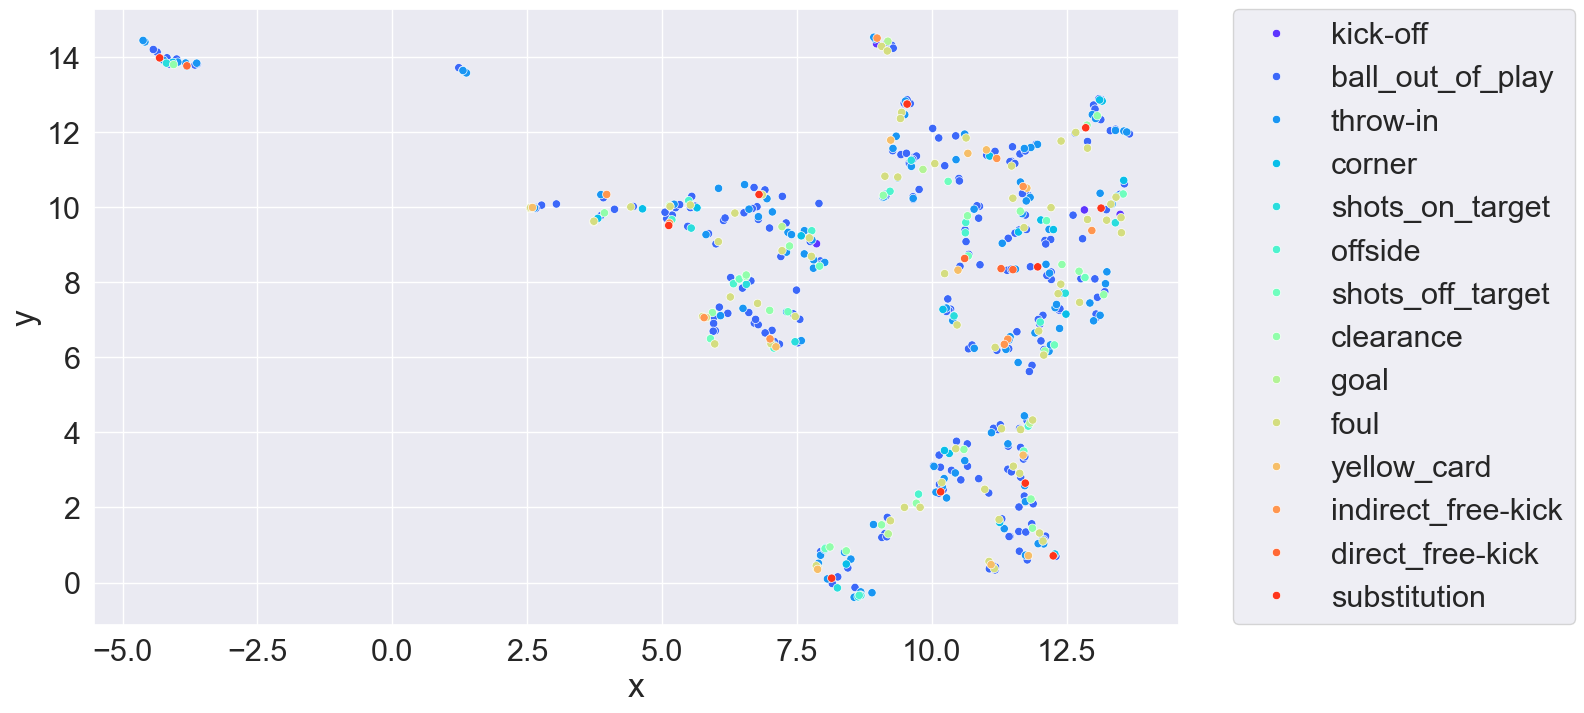

In [15]:
run_umap_and_plot(5, classifier_pooler_features, labels_mapped, min_dist=0.1)

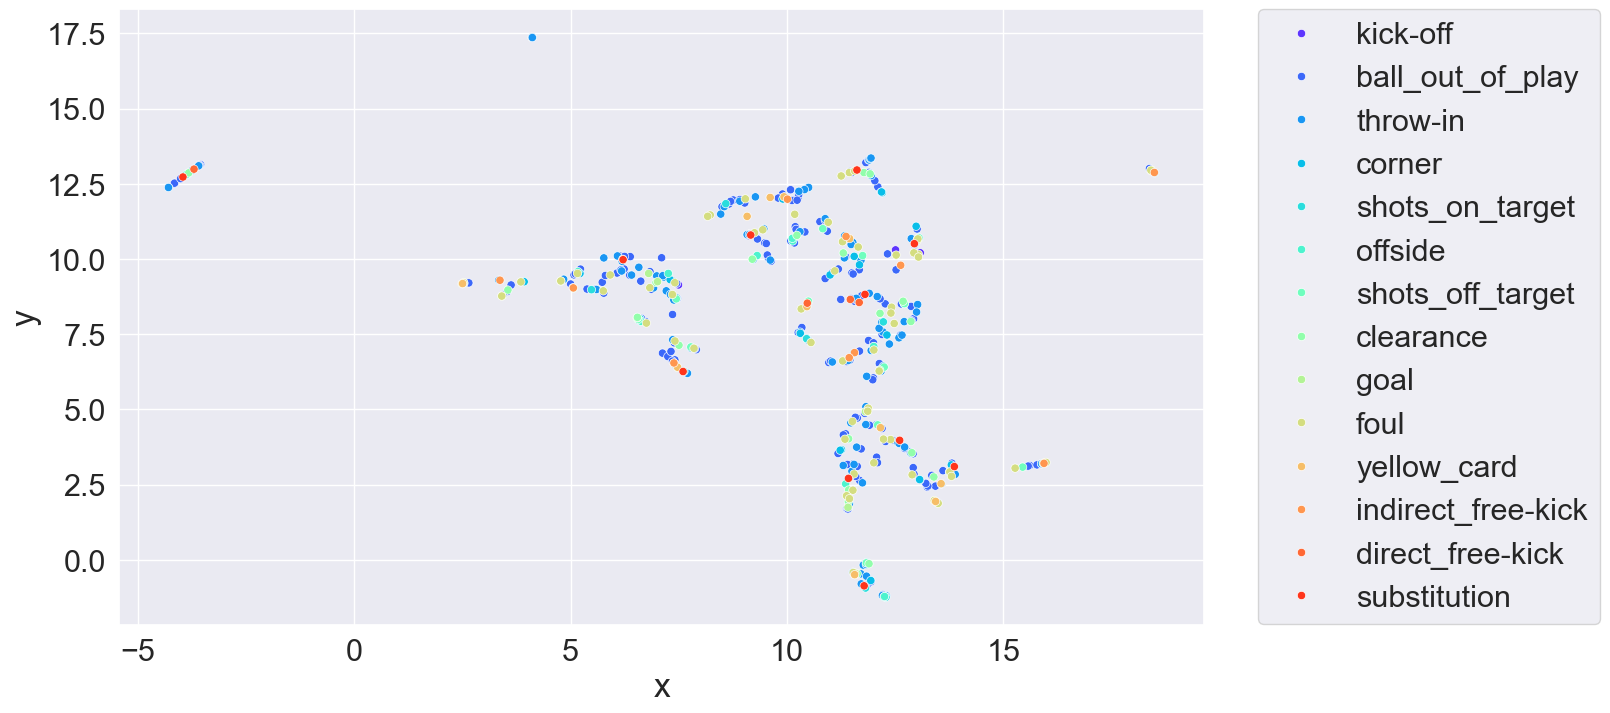

In [16]:
run_umap_and_plot(5, classifier_pooler_features, labels_mapped, min_dist=0.01)

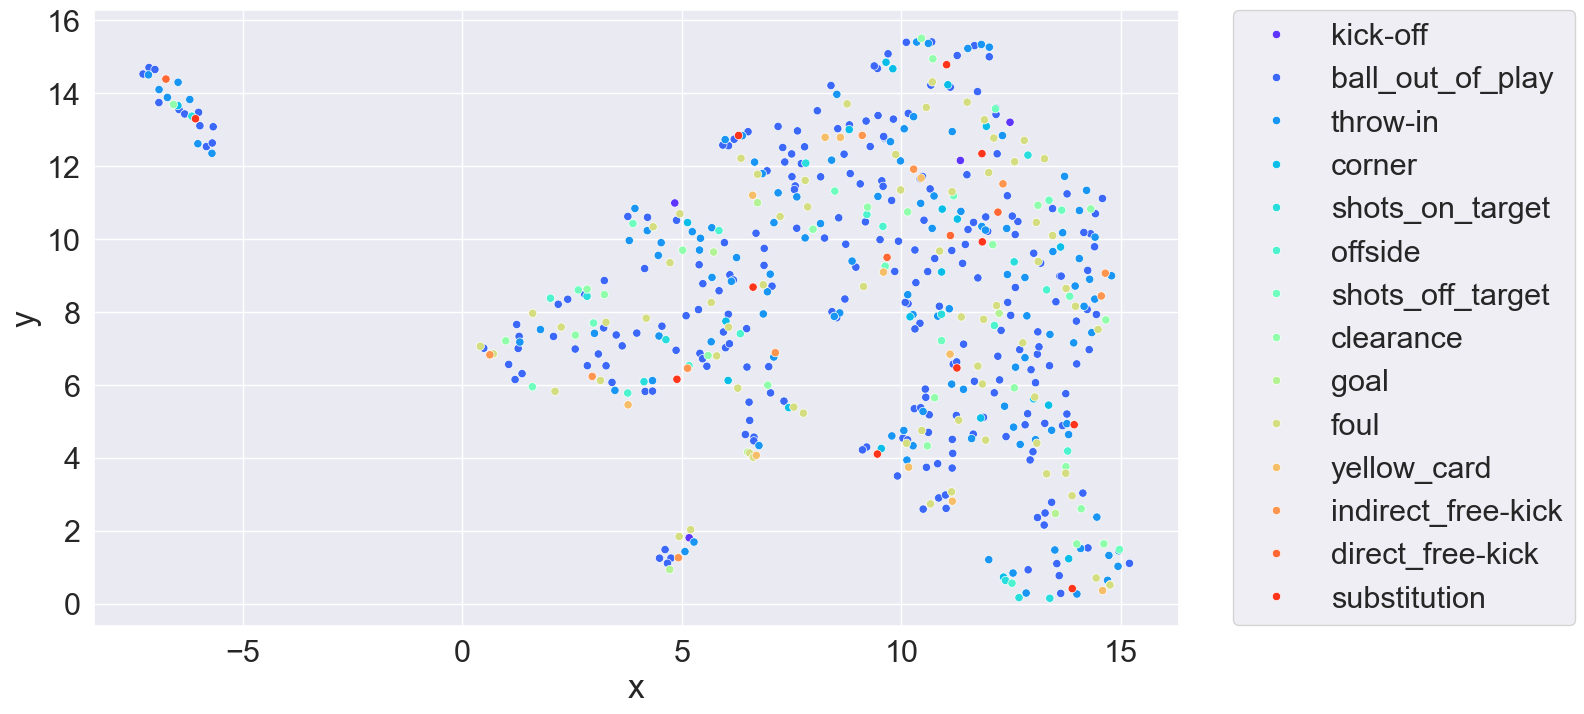

In [17]:
run_umap_and_plot(5, classifier_pooler_features, labels_mapped, min_dist=0.5)

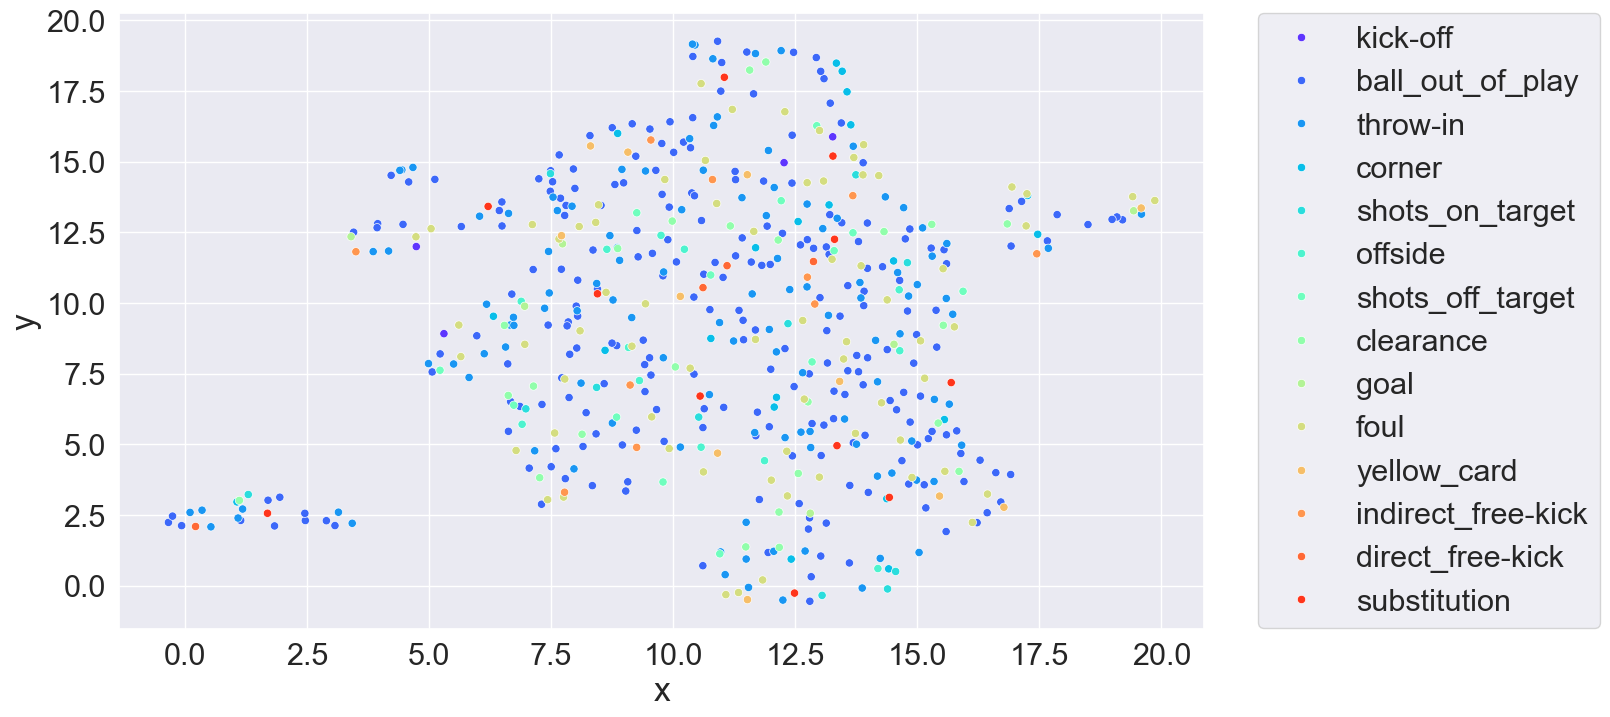

In [18]:
run_umap_and_plot(5, classifier_pooler_features, labels_mapped, min_dist=0.8)

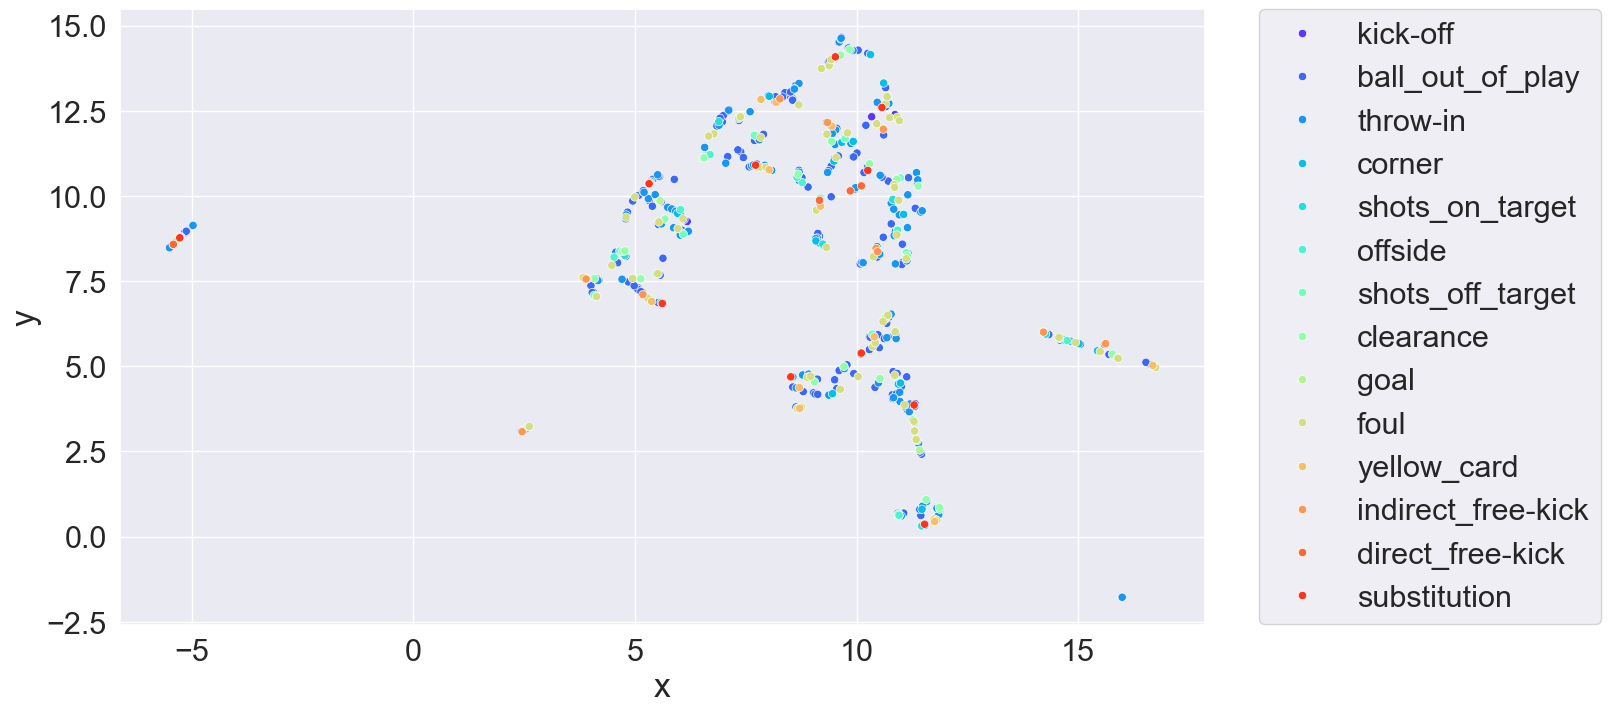

In [19]:
run_umap_and_plot(5, classifier_pooler_features, labels_mapped, min_dist=0.0125)